# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [80]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [81]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [82]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


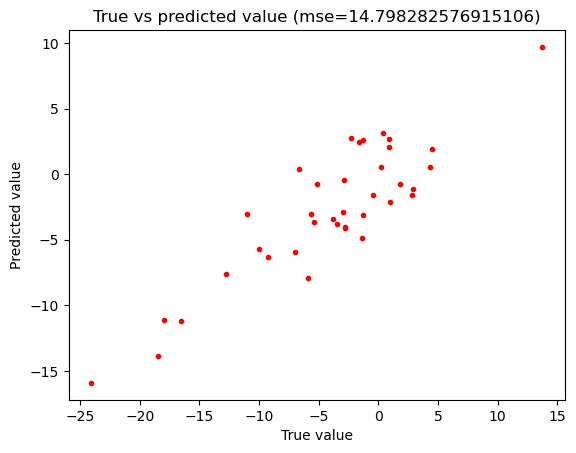

In [83]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



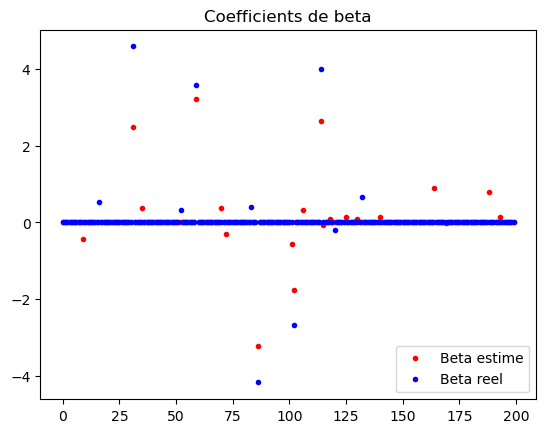

In [84]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

...



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

Mean MSE for each alpha :  [ 9.20370195  8.87775012  8.83170721  8.96901179  9.21286271  9.50323677
  9.79648448 10.1208558  10.50075756 10.9077991  11.34929255 11.80933435
 12.32712304]
Best alpha :  0.3


Text(0, 0.5, 'Mean MSE')

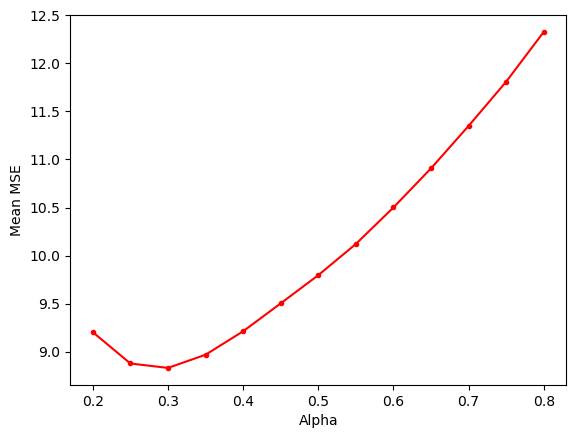

In [85]:

from sklearn.model_selection import KFold
alphas =  [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
kf = KFold(n_splits=8, shuffle=False)
mean_mse_list = []
for alpha in alphas:
    mse_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)
        y_pred_lasso = lasso_regressor.predict(X_test)
        mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
        mse_list.append(mse_score_lasso)
    mean_mse_list.append(np.mean(mse_list))

mean_mse_array = np.array(mean_mse_list)
print("Mean MSE for each alpha : ", mean_mse_array)
best_alpha = alphas[np.argmin(mean_mse_array)]
print("Best alpha : ", best_alpha)

plt.plot(alphas, mean_mse_list, 'r.-')
plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
    





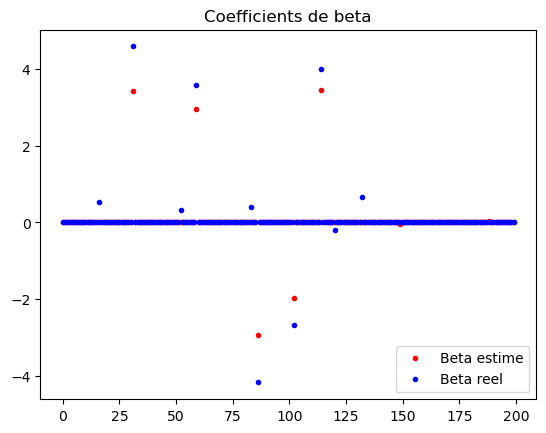

In [86]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [87]:


from sklearn.linear_model import LinearRegression
selected_vars = []
bic = np.inf

# Select the first p columns of X
for q in range(X.shape[1]):
    candidate_var_index = q
    print("Considering variable", candidate_var_index)
    X_selected = X[:, selected_vars + [candidate_var_index]]
    print("Selecting among first", q, "variables")
    print("Shape of selected X:", X_selected.shape)
    lr = LinearRegression()
    lr.fit(X_selected, y)
    y_pred = lr.predict(X_selected)
    mse_model = mean_squared_error(y, y_pred)
    bic_candidate = n*np.log10(mse_model) + np.log10(n)*(len(selected_vars) + 1)
    if bic_candidate < bic:
        bic = bic_candidate
        selected_vars.append(q)  # Store the index of the selected variable
        print("Variable", q, "selected, BIC:", bic)
    else:
        print("No improvement in BIC, selecting among next variables.")
print("Selected variables:", selected_vars)
print("Final BIC:", bic)



Considering variable 0
Selecting among first 0 variables
Shape of selected X: (75, 1)
Variable 0 selected, BIC: 139.69462185860468
Considering variable 1
Selecting among first 1 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 2
Selecting among first 2 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 3
Selecting among first 3 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 4
Selecting among first 4 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 5
Selecting among first 5 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 6
Selecting among first 6 variables
Shape of selected X: (75, 2)
No improvement in BIC, selecting among next variables.
Considering variable 7
